In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [138]:
import warnings
warnings.filterwarnings('ignore')

In [139]:
df = pd.read_csv("./data/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [113]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

<Axes: >

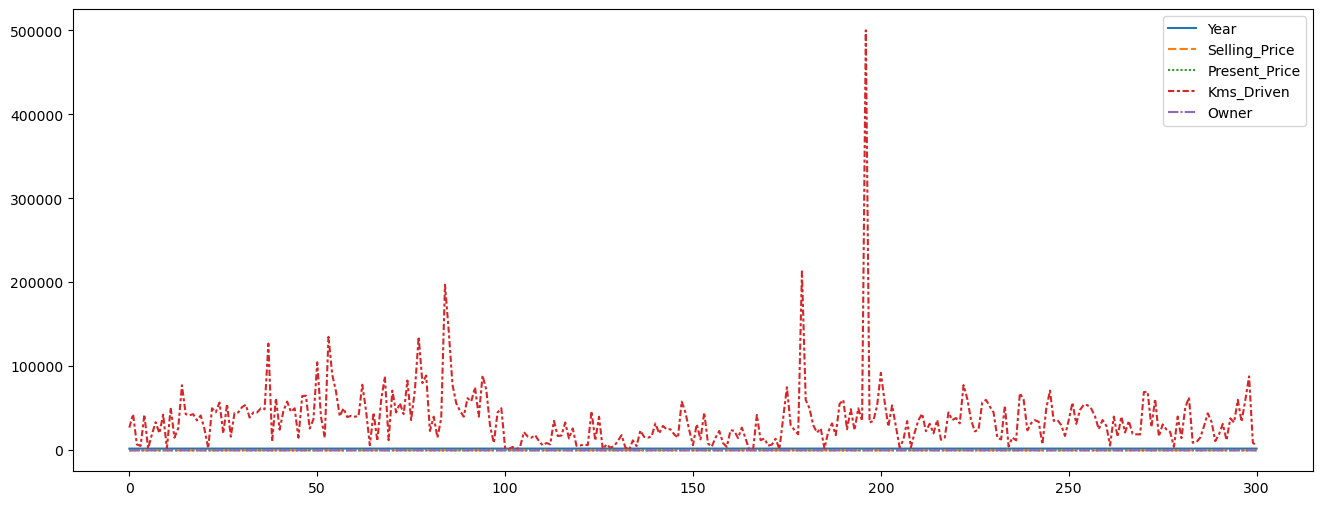

In [114]:
plt.figure(figsize = (16, 6))
sns.lineplot(data = df)

In [115]:
df.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [116]:
df.shape

(301, 9)

In [117]:
df.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [118]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


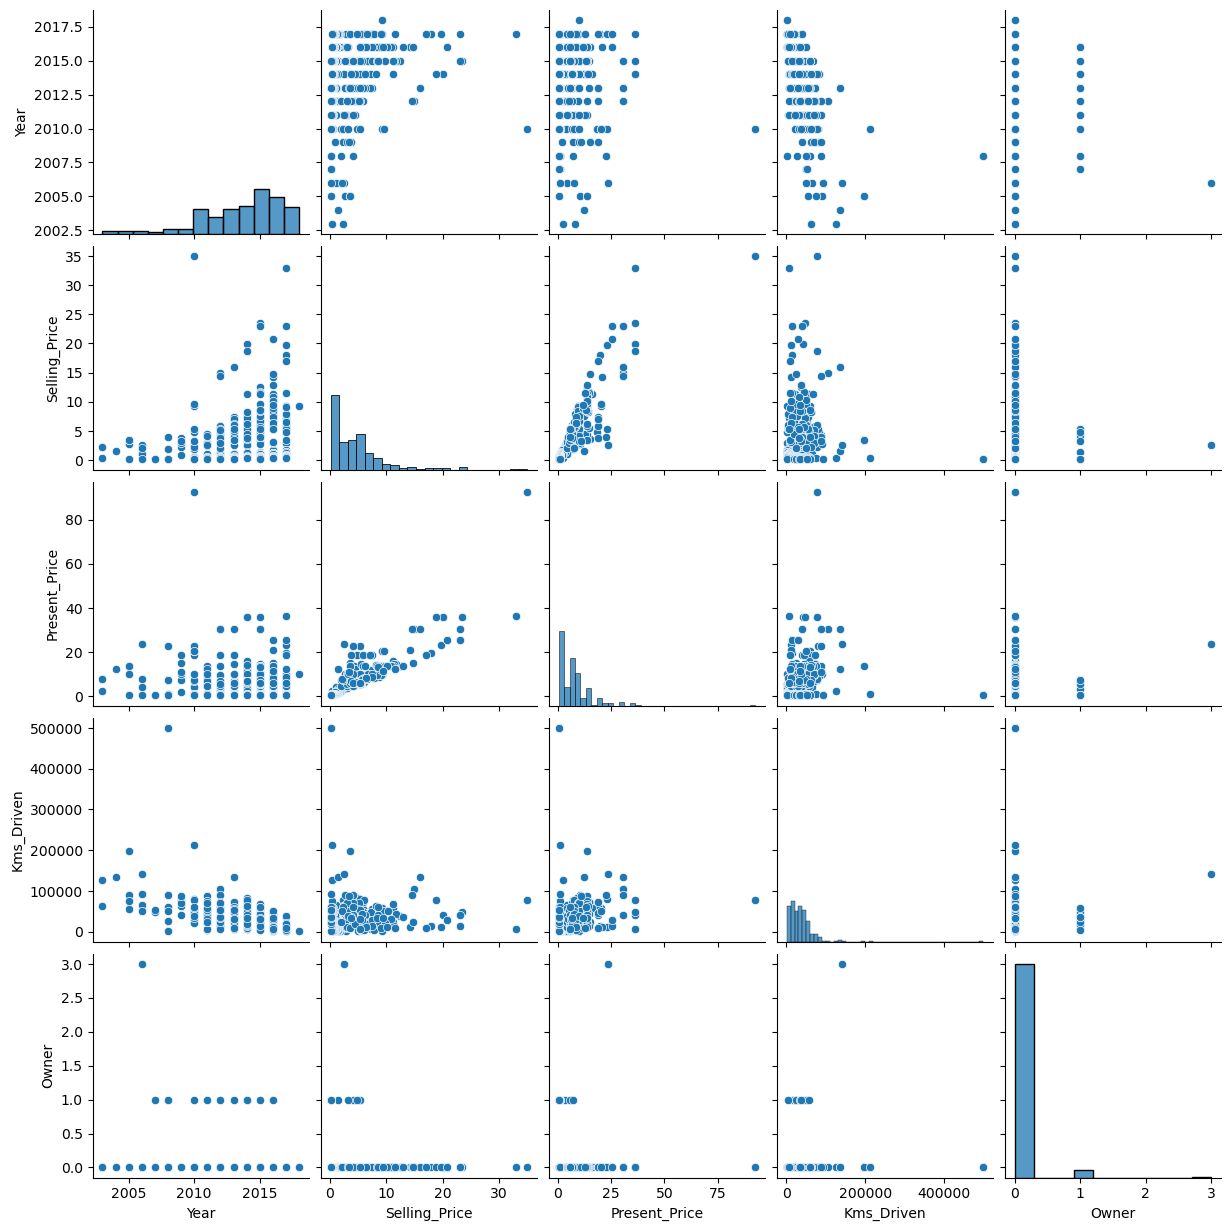

In [119]:
sns.pairplot(df)

In [140]:
df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [141]:
# Preprocessing
X = df.drop(['Car_Name','Selling_Price'], axis=1)
y = df['Selling_Price']

In [142]:
# Categorical features to be one-hot encoded
categorical_features = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

In [143]:
# Numeric features to be scaled
numeric_features = ['Year', 'Present_Price', 'Kms_Driven']


In [144]:
np.max(df.Year)  

2018

In [145]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])


In [146]:
model = RandomForestRegressor(random_state=42)


In [147]:
# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [149]:
preprocessor.fit(X_train)
joblib.dump(preprocessor, 'preprocessing.pkl')


['preprocessing.pkl']

In [150]:
# Grid search parameters
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}

In [151]:
# Initialize Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5)


In [152]:
# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Year',
                                                                          'Present_Price',
                                                                          'Kms_Driven']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Fuel_Type',
                                                                          'Seller_Type',
                                                                          'Transmission',
                                                                          'Owner'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 200]})

In [153]:
print("Best parameters: ", grid_search.best_params_)


Best parameters:  {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 50}


In [154]:
# Predict on test data
y_pred = grid_search.predict(X_test)

In [155]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

# Save the model
joblib.dump(grid_search.best_estimator_, 'model.pkl')

RMSE:  0.9608231276478261


['model.pkl']

In [156]:
Accuracy = ("The accuracy of model is :", r2_score(y_test, y_pred)*100)

In [157]:
Accuracy

('The accuracy of model is :', 95.99236962357178)

In [158]:
import sklearn
print(sklearn.__version__)


1.2.1
